# Trial - NFLX with Decission Tree and Linear Regression

In [ ]:
pip install pandas-datareader

In [ ]:
# Install library
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the stock data
nflx_daily = web.DataReader('AAPL', data_source = 'yahoo', start = '2015-01-01', end = '2021-05-31')
# Show the stock data
print(nflx_daily.head())
print(nflx_daily.tail())

In [ ]:
# Get the number of trading days
# 1 year of trading days is 252 or 253
# This data contain 6 year trading days, from 01-01-2015 to 31-05-2021
print("Jumlah kolom dan baris : ", nflx_daily.shape)
print(nflx_daily.info())
print("Cek missing value :", nflx_daily.isnull().sum())

Jumlah kolom dan baris :  (1613, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1613 entries, 2015-01-02 to 2021-05-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1613 non-null   float64
 1   Low        1613 non-null   float64
 2   Open       1613 non-null   float64
 3   Close      1613 non-null   float64
 4   Volume     1613 non-null   float64
 5   Adj Close  1613 non-null   float64
dtypes: float64(6)
memory usage: 88.2 KB
None
Cek missing value : High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64


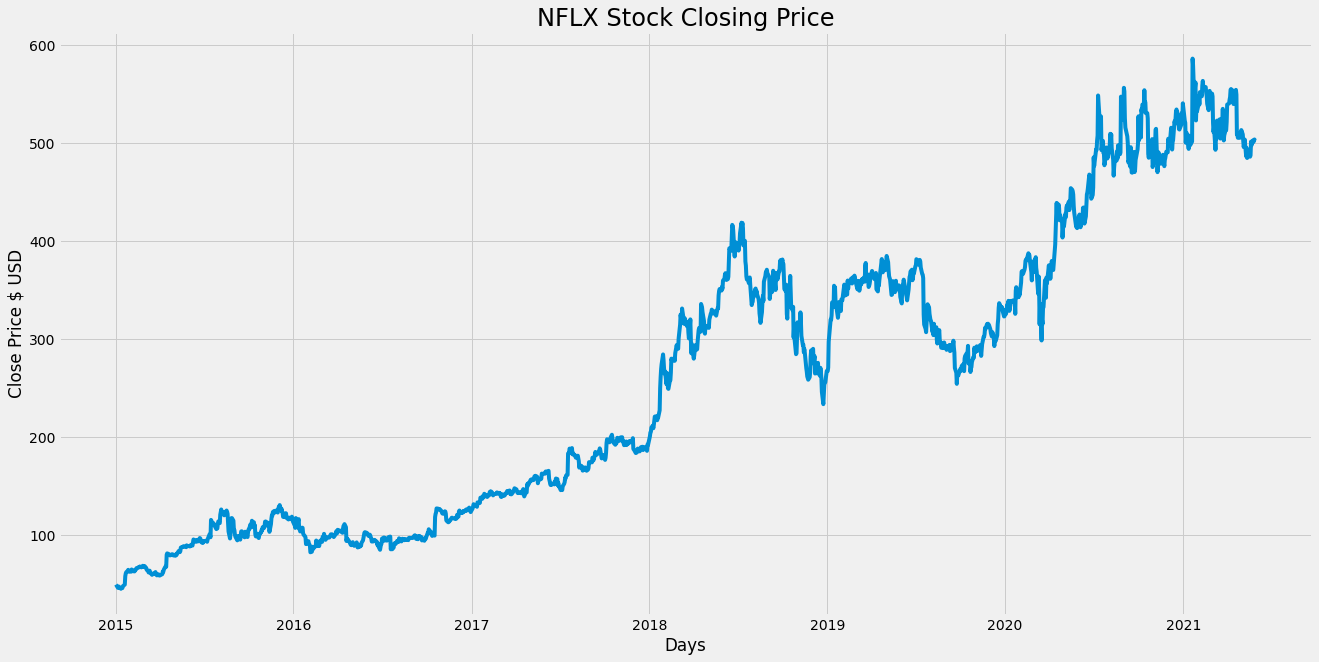

In [ ]:
# Visualize the close price data
plt.figure(figsize = (20, 10))
plt.plot(nflx_daily['Close'])
plt.title('NFLX Stock Closing Price', fontsize = 24)
plt.xlabel('Days')
plt.ylabel('Close Price $ USD')
plt.show()

In [ ]:
# Get only the close price
nflx_daily = nflx_daily[['Close']]
nflx_daily.head()

,Close
Date,
2015-01-02,49.848572
2015-01-05,47.311428
2015-01-06,46.501431
2015-01-07,46.742859
2015-01-08,47.779999


In [ ]:
# Create a variable to predict "x" days out into the future
future_days = 25

# Create a new column (target) shifted "x" units/days up
nflx_daily['Prediction'] = nflx_daily[['Close']].shift(-future_days)
print(nflx_daily.head())
print(nflx_daily.tail())

                Close  Prediction
Date                             
2015-01-02  49.848572   63.295715
2015-01-05  47.311428   64.849998
2015-01-06  46.501431   64.984283
2015-01-07  46.742859   65.247147
2015-01-08  47.779999   66.585716
                 Close  Prediction
Date                              
2021-05-24  502.899994         NaN
2021-05-25  501.339996         NaN
2021-05-26  502.359985         NaN
2021-05-27  503.859985         NaN
2021-05-28  502.809998         NaN


In [ ]:
# Create the feature dataset (X) and convert it to a numpy array and remove the last "x" rows/days
X = np.array(nflx_daily.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 49.84857178]
 [ 47.31142807]
 [ 46.50143051]
 ...
 [508.8999939 ]
 [508.77999878]
 [505.54998779]]


In [ ]:
# Create the target dataset (Y) and convert it to a numpy array and get all of the target values except last "x" rows
y = np.array(nflx_daily['Prediction'])[:-future_days]
print(y)

[ 63.29571533  64.84999847  64.98428345 ... 502.35998535 503.85998535
 502.80999756]


In [ ]:
# Split the dataset into a 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#Check the shapes
print("Shape of X_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (1191, 1)
Shape of y_train : (1191,)
Shape of X_test : (397, 1)
Shape of y_test : (397,)


In [ ]:
# Create the models
# Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)

# Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
# Get the last "x" rows of the feature dataset
x_future = nflx_daily.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[512.17999268],
       [523.10998535],
       [535.09002686],
       [520.80999756],
       [502.85998535],
       [508.04998779],
       [513.95001221],
       [513.39001465],
       [521.65997314],
       [539.41998291],
       [540.66998291],
       [544.5300293 ],
       [546.98999023],
       [554.58001709],
       [555.30999756],
       [552.7800293 ],
       [553.72998047],
       [540.02001953],
       [549.2199707 ],
       [546.53997803],
       [554.44000244],
       [549.57000732],
       [508.8999939 ],
       [508.77999878],
       [505.54998779]])

In [ ]:
# Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()

# Show the model linear regression predicton
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[510.29998779 505.54998779 506.51998901 509.         513.4699707
 540.2199707  503.17999268 496.07998657 499.54998779 503.83999634
 486.69000244 513.39001465 484.98001099 486.66000366 493.36999512
 531.78997803 486.27999878 487.70001221 501.67001343 497.89001465
 502.8999939  501.67001343 502.35998535 503.85998535 480.23999023]

[515.28035957 526.03322132 537.81911485 523.77050701 506.11139183
 511.21728534 517.02169425 516.47077198 524.60670794 542.07889985
 543.30864241 547.10613308 549.52622801 556.99325126 557.7114017
 555.22243398 556.15699029 542.66921231 551.72006952 549.08350868
 556.85550568 552.06443347 512.05351629 511.93546581 508.75780022]


In [ ]:
# Model Evaluation
# Decission Tree Model accuracy
print("Decission Tree Metric Accuracy\n")
print("Mean Absolute Error : ", metrics.mean_absolute_error(x_future, tree_prediction))
print("Mean Squared Error : ", metrics.mean_squared_error(x_future, tree_prediction))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(x_future, tree_prediction)))

Decission Tree Metric Accuracy

Mean Absolute Error :  33.541199951171876
Mean Squared Error :  1551.10461245846
Root Mean Squared Error :  39.38406546382001


In [ ]:
# Model Evaluation
# Linear Regression Model accuracy
print("Linear Regression Metric Accuracy\n")
print("Mean Absolute Error : ", metrics.mean_absolute_error(x_future, lr_prediction))
print("Mean Squared Error : ", metrics.mean_squared_error(x_future, lr_prediction))
print("Root Mean Squared Error : ", np.sqrt(metrics.mean_squared_error(x_future, lr_prediction)))

Linear Regression Metric Accuracy

Mean Absolute Error :  2.777784111556839
Mean Squared Error :  7.804689353401394
Root Mean Squared Error :  2.7936874115407746


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


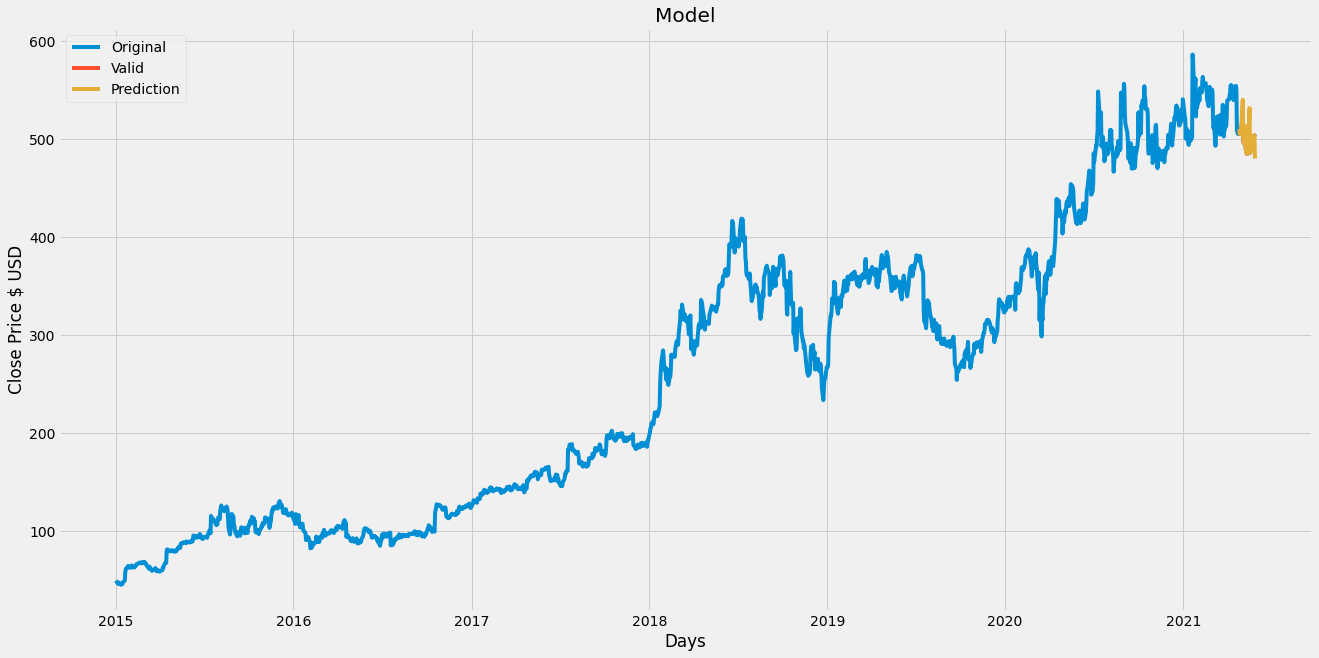

In [ ]:
# Visualize the model tree prediction
#predictions_tree = tree_prediction

valid = nflx_daily[X.shape[0]:]
valid['Predictions'] = tree_prediction

plt.figure(figsize = (20, 10))
plt.title('Model')
plt.plot(nflx_daily['Close'])
plt.plot(valid[['Close', 'Predictions']])

plt.xlabel('Days')
plt.ylabel('Close Price $ USD')
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()

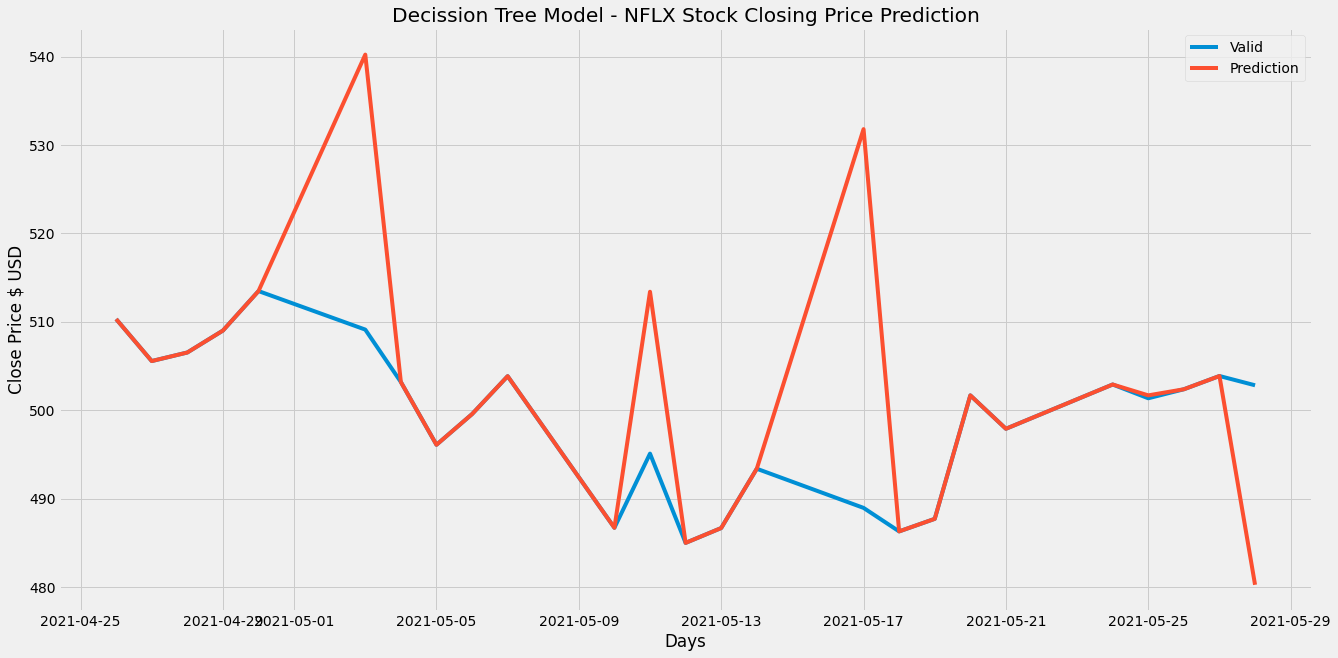

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Decission Tree Model - NFLX Stock Closing Price Prediction')
plt.plot(valid[['Close', 'Predictions']])
plt.xlabel('Days')
plt.ylabel('Close Price $ USD')
plt.legend(['Valid', 'Prediction'])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


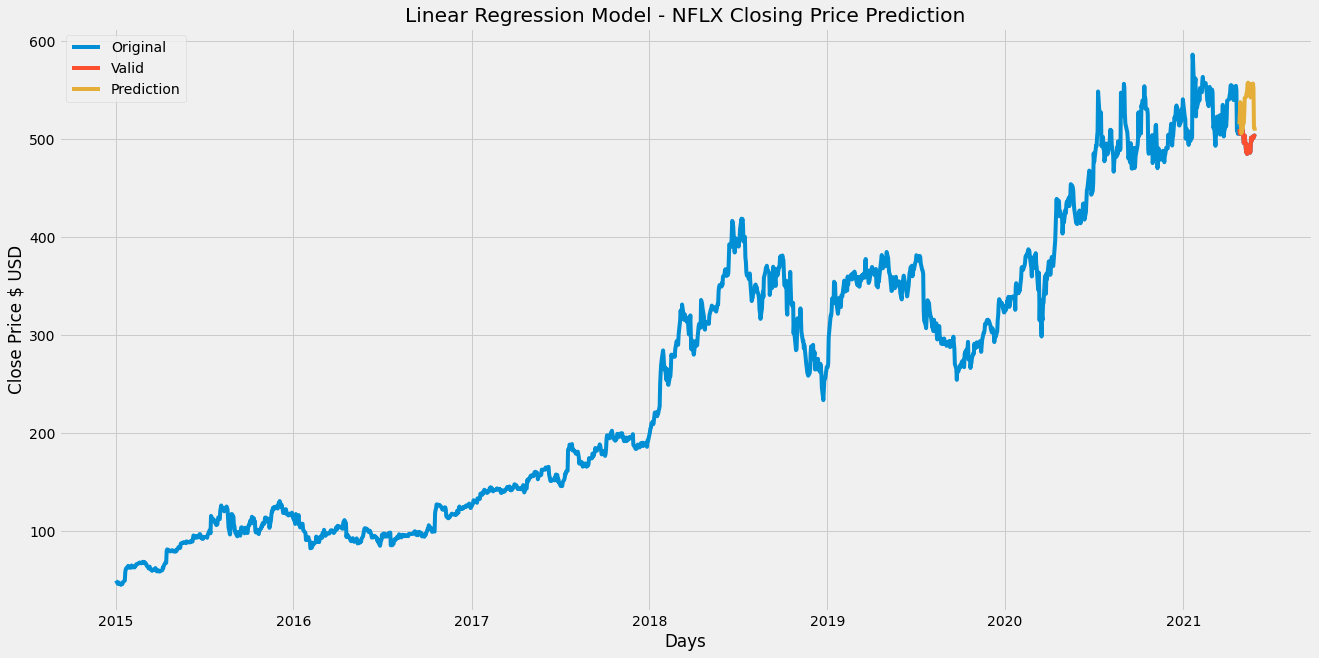

In [ ]:
# Visualize the model lr prediction
predictions_lr = lr_prediction

valid = nflx_daily[X.shape[0]:]
valid['Predictions LR'] = predictions_lr
plt.figure(figsize = (20, 10))
plt.title('Linear Regression Model - NFLX Closing Price Prediction')
plt.plot(nflx_daily['Close'])
plt.plot(valid[['Close', 'Predictions LR']])
plt.xlabel('Days')
plt.ylabel('Close Price $ USD')
plt.legend(['Original', 'Valid', 'Prediction'])
plt.show()

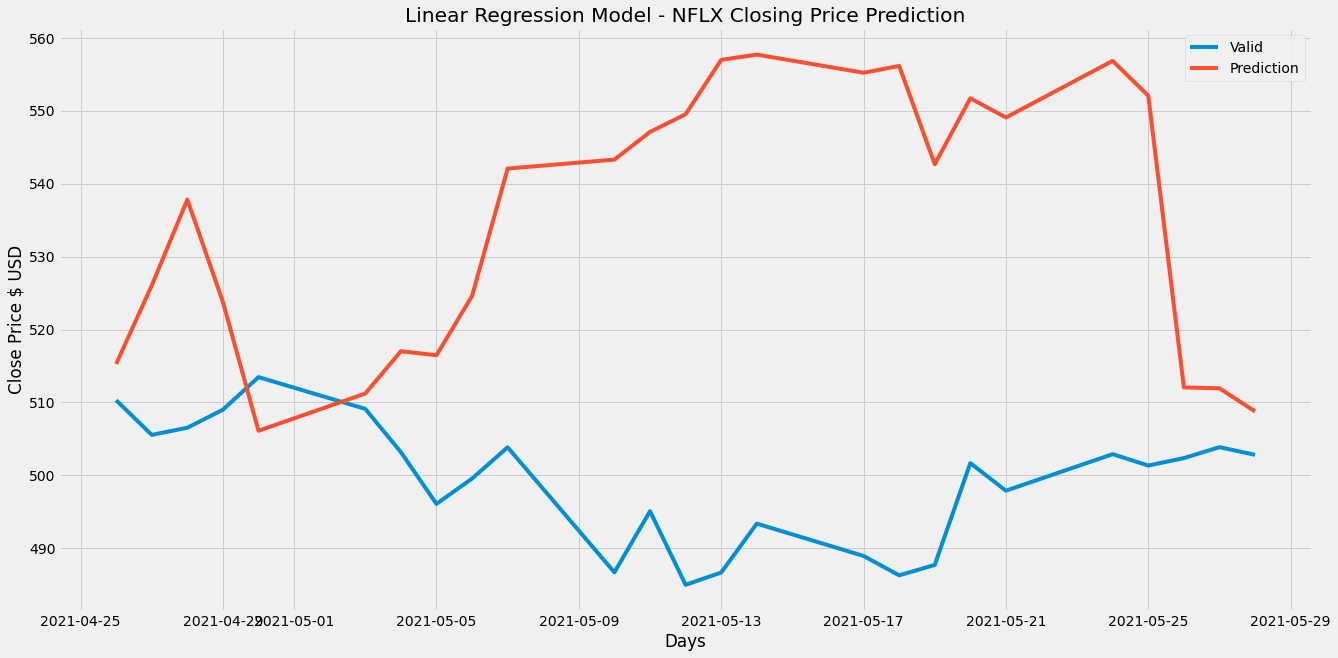

In [ ]:
plt.figure(figsize = (20, 10))
plt.title('Linear Regression Model - NFLX Closing Price Prediction')
plt.plot(valid[['Close', 'Predictions LR']])
plt.xlabel('Days')
plt.ylabel('Close Price $ USD')
plt.legend(['Valid', 'Prediction'])
plt.show()